In [1]:
%matplotlib inline

import warnings
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set()

# Loading the excel file
xl = pd.ExcelFile("Online Retail.xlsx")

# Loading our Excel sheet in a dataframe 
df = xl.parse('Online Retail')
df.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


# Cleaning dataset

(541909, 8)

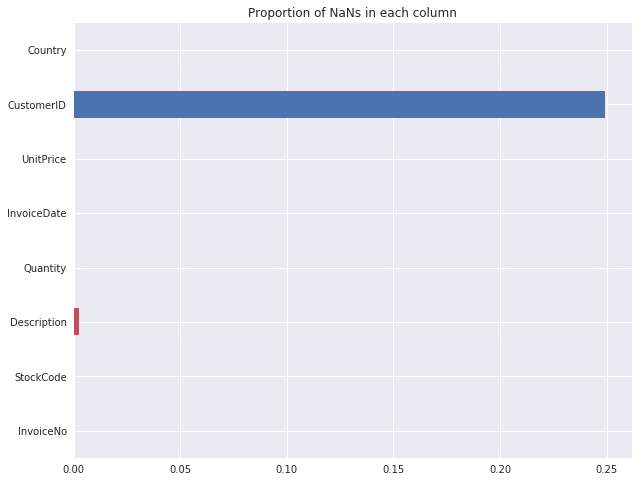

In [2]:
# We visualize, using a barplot, Nans proportion in each column of our dataset.

plt.figure(figsize=(10, 8))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of NaNs in each column")
df.shape

In [3]:
# Our work is based on consumer knowledge, so we delete
# the missing values present in the CustomerID column

df.dropna(axis=0, subset=["CustomerID"], inplace=True)
df.shape

(406829, 8)

(406829, 8)

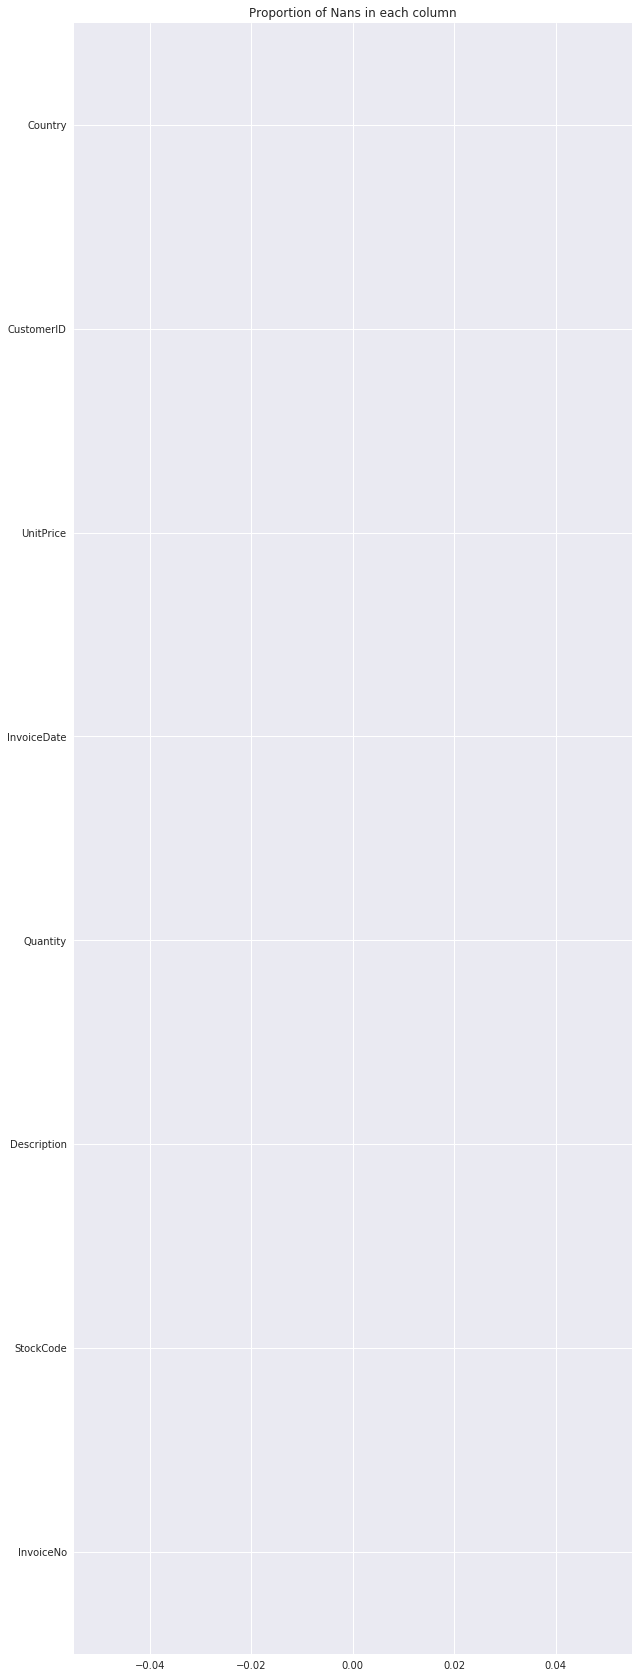

In [4]:
plt.figure(figsize=(10, 30))
df.isnull().mean(axis=0).plot.barh()
plt.title("Proportion of Nans in each column")
df.shape

# We no longer have missing values in any of our columns

In [5]:
# Duplicate data is deleted (10,000 duplicates)

df.drop_duplicates(inplace=True)
df.shape

(401604, 8)

In [6]:
# We make sure to have only positive quantities and prices

df = df[df["UnitPrice"]>0]
df = df[df["Quantity"]>0]
df.shape

(392692, 8)

In [7]:
# Make sure there are no holes in the missing indexes

df = df.reset_index(level=0, drop=True)

# Exploratory data analysis (EDA)

In [8]:
# Creation of a new TotalPrice variable that represents the total price of purchased items

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [9]:
# Creation of a variable giving only the billing date
from datetime import datetime

df["Date"] = df["InvoiceDate"].apply(lambda x: datetime.date(x))

# Creation of a variable giving only the billing time
df["Time"] = df["InvoiceDate"].apply(lambda x: datetime.time(x))

In [10]:
df.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,2010-12-01,08:26:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,08:28:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,08:28:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,08:34:00


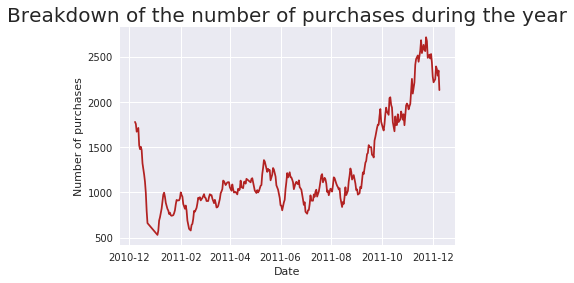

In [11]:
# Breakdown of the number of purchases during the year

num_purchases_by_date = df.groupby('Date').size()
plt.title("Breakdown of the number of purchases during the year", size=20)
ax = plt.axes()
ax.set(ylabel="Number of purchases")
num_purchases_by_date.rolling(window=7).mean().plot(color='firebrick');

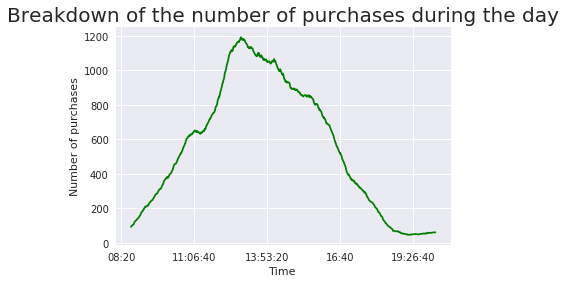

In [12]:
# Breakdown of the number of purchases during the day

num_purchases_by_time = df.groupby('Time').size()
plt.title("Breakdown of the number of purchases during the day", size=20)
ax = plt.axes()
ax.set(ylabel="Number of purchases")
num_purchases_by_time.rolling(window=60).mean().plot(color='green');

United Kingdom          0.889254
Germany                 0.022982
France                  0.021202
EIRE                    0.018401
Spain                   0.006313
Netherlands             0.006007
Belgium                 0.005172
Switzerland             0.004688
Portugal                0.003700
Australia               0.003007
Norway                  0.002727
Italy                   0.001930
Channel Islands         0.001902
Finland                 0.001744
Cyprus                  0.001536
Sweden                  0.001146
Austria                 0.001014
Denmark                 0.000968
Poland                  0.000840
Japan                   0.000817
Israel                  0.000624
Unspecified             0.000614
Singapore               0.000565
Iceland                 0.000463
USA                     0.000456
Canada                  0.000385
Greece                  0.000369
Malta                   0.000285
United Arab Emirates    0.000173
European Community      0.000153
RSA       

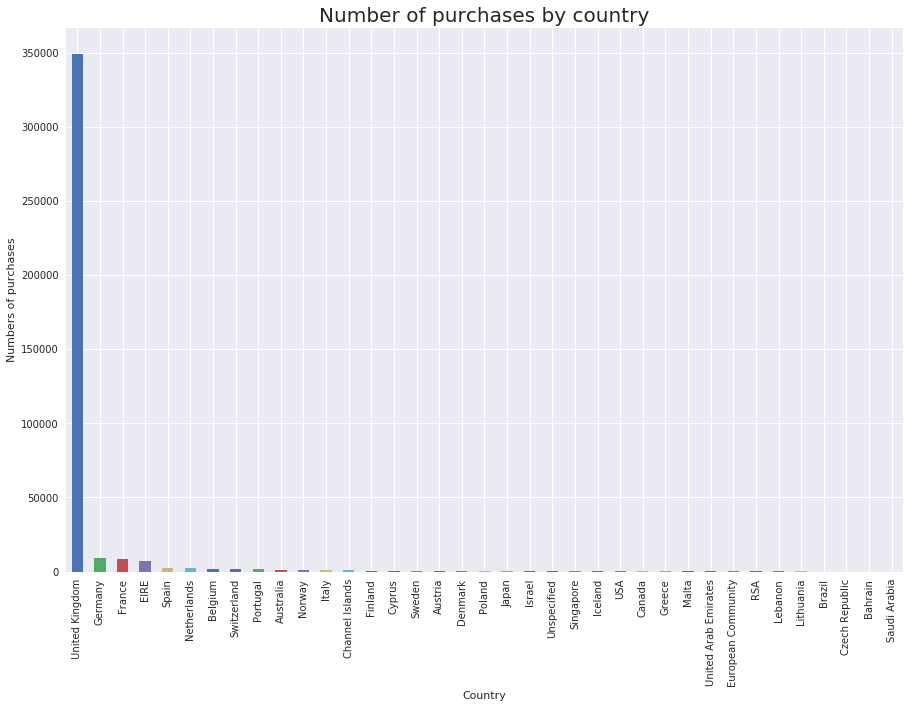

In [13]:
# Chart showing the number of purchases by country

Country = df.groupby(df["Country"])
plt.figure(figsize=(15, 10))
plt.title("Number of purchases by country", size=20)
ax = plt.axes()
ax = ax.set(xlabel="Country", ylabel='Numbers of purchases')
Country.size().sort_values(ascending=False).plot.bar()
df['Country'].value_counts(1)

count    392692.000000
mean         22.631500
std         311.099224
min           0.001000
25%           4.950000
50%          12.450000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

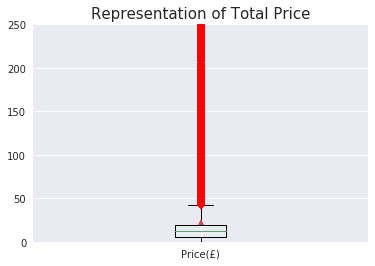

In [14]:
red_diamond = dict(markerfacecolor='r', marker='D')

# Représentation de Total_Price
plt.title("Representation of Total Price", size=15)
plt.ylim(0,250)
plot = plt.boxplot(df['TotalPrice'], flierprops=red_diamond,
                   labels=['Price(£)'], showmeans= True)
df['TotalPrice'].describe()

In [15]:
def get_stats(group):
    ''' The function takes in a group, and gives out
        different statistics (minimum, maximum, average,
        and the number of elements)'''
    
    return {'min': group.min(), 'max': group.max(),
            'count': group.count(), 'mean': np.mean(group)}

In [16]:
# Transaction amount statistics for each country

global_stats = df['TotalPrice'].groupby(df['Country']).apply(get_stats).unstack()
global_stats

,count,max,mean,min
Country,,,,
Australia,1181.0,1718.40,117.234386,0.420
Austria,398.0,360.00,25.624824,2.880
Bahrain,17.0,120.00,32.258824,11.600
Belgium,2031.0,165.00,20.283772,2.500
Brazil,32.0,175.20,35.737500,15.000
Canada,151.0,550.94,24.280662,2.500
Channel Islands,747.0,408.00,27.363507,4.560
Cyprus,603.0,320.69,22.392786,0.830
Czech Republic,25.0,70.80,33.069600,10.080


Text(0.5,1,'Average amount of transactions in different countries')

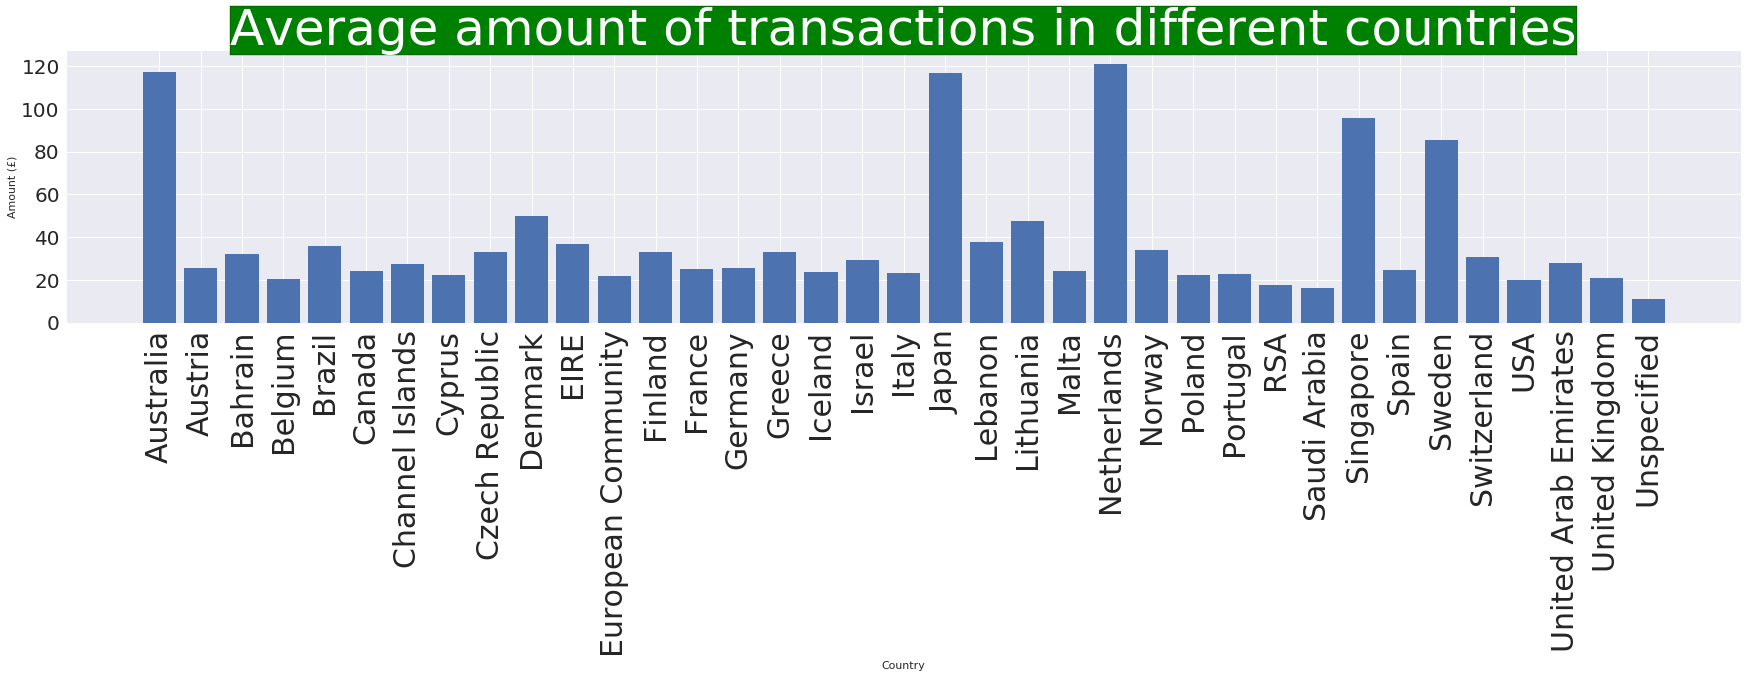

In [17]:
labels = [s for s in global_stats.index]

sizes  = global_stats['mean'].values
plt.figure(figsize=(30,5))
plot = plt.bar(labels, sizes)
ax = plt.axes()
ax.set(xlabel='Country', ylabel='Amount (£)')
plt.xticks(rotation=90, size=30)
plt.yticks(size=20)
plt.title('Average amount of transactions in different countries',
          bbox={'facecolor':'green', 'pad':0.5}, color='w', fontsize=50)

In [18]:
import re, nltk, spacy, gensim

def sent_to_words(sentences):
    ''' Tokenisation of sentences without punctuation'''
    
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True Remove the punctuation
        

data_words = list(sent_to_words(df["Description"]))
print(data_words[:1])

[['white', 'hanging', 'heart', 'light', 'holder']]


In [19]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """It keeps the lema of the words (lemma is the uninflected form of a word)"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' 
                                   for token in doc if token.pos_ in allowed_postags]))
    return texts_out


In [20]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:2])

['white hang heart light holder', 'white metal lantern']


In [21]:
# Create our products categories using LDA algorithm 

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

n_features = 3000 
n_components = 5 # number of categories
n_top_words = 15


print("Extraction of tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

tf = tf_vectorizer.fit_transform(data_lemmatized)


def print_top_words(model, feature_names, n_top_words):
    
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


lda = LatentDirichletAllocation(n_components=n_components, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0).fit(tf)

print("\n The categories in the LDA model :")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Extraction of tf features for LDA...

 The categories in the LDA model :
Topic #0: heart light bottle pink holder decoration hot water hang small set tea home white love
Topic #1: red retrospot box spaceboy doily wrap silver blue set feltcraft clock doormat children pink tissue
Topic #2: set glass candle skull light pencil antique rise box fairy bowl calm gift party jar
Topic #3: cake metal card wooden tin pack sign case star vintage mini colour ceramic regency green
Topic #4: bag christma vintage design jumbo set lunch paper kit paisley dolly pantry ribbon girl hand



In [22]:
# Création de la variable Categories donnant la catégorie de chaque produit acheté

topics = lda.transform(tf)
df_topics = pd.DataFrame(topics)
list_topics = []

for index, row in df_topics.iterrows():
    column_line = str(row.idxmax(max(row)))
    list_topics.append(column_line)
    
df["Categories"] = pd.DataFrame(list_topics)

In [23]:
df['Categories'].value_counts()

4    93622
3    79302
0    78045
1    72829
2    68894
Name: Categories, dtype: int64

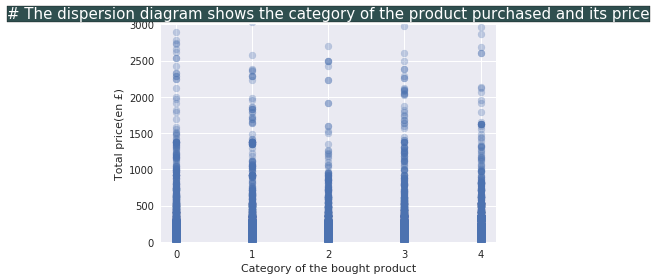

In [24]:
# The dispersion diagram shows the category of the product purchased and its price

sorted_categories = sorted(zip(df["Categories"], df["TotalPrice"]))
xcat, ycat = zip(*sorted_categories)
plt.title("# The dispersion diagram shows the category of the product purchased and its price",
         bbox={'facecolor':'darkslategrey', 'pad': 0.3}, color='w', fontsize=15)
plt.scatter(xcat, ycat, marker="o", alpha=0.3)
plt.ylim(0,3000)
ax = plt.axes()
ax = ax.set(xlabel="Category of the bought product", ylabel='Total price(en £)')

In [25]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Time,Categories
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00,1


In [26]:
# One hot encoding on the variable Country

for country in df['Country'].unique():
    df[country] = df['Country'].str.contains(country).apply(lambda x:1 if x else 0)

In [27]:
# One hot encoding on the variable Categories

for category in df['Categories'].unique():
    df["Category {}".format(category)] = df['Categories'].str.contains(category).apply(lambda x:1 if x else 0)

In [28]:
# Representing variable Time in minutes

df["Time_Minutes"] = df["Time"].apply(lambda x: x.hour*60 + x.minute)

In [29]:
# Conversion of purchase dates into integers corresponding to the number of days
# since Day 1 of Year 1 of the Gregorian calendar

df['New_Date'] = df['Date'].apply(lambda x: x.toordinal())

In [30]:
# Unrelevant categories are removed for the remainder

df.drop(["Country", "Categories", "InvoiceDate", "UnitPrice", "Date", "Description", "StockCode", "Time"],
        axis=1, inplace=True)

In [31]:
df.head()

,InvoiceNo,Quantity,CustomerID,TotalPrice,United Kingdom,France,Australia,Netherlands,Germany,Norway,...,Bahrain,Malta,RSA,Category 0,Category 3,Category 1,Category 2,Category 4,Time_Minutes,New_Date
0,536365,6,17850.0,15.30,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,506,734107
1,536365,6,17850.0,20.34,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,506,734107
2,536365,8,17850.0,22.00,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,506,734107
3,536365,6,17850.0,20.34,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,506,734107
4,536365,6,17850.0,20.34,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,506,734107


In [39]:
df.to_csv('new_data_P5.csv',encoding='utf-8', index=False)